                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  100
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -301.018
Date:                Sun, 13 Oct 2024   AIC                            608.037
Time:                        14:52:27   BIC                            615.822
Sample:                             0   HQIC                           611.187
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9993      0.002    577.800      0.000       0.996       1.003
ma.L1         -0.9080      0.047    -19.407      0.000      -1.000      -0.816
sigma2        24.7179      3.634      6.801      0.0

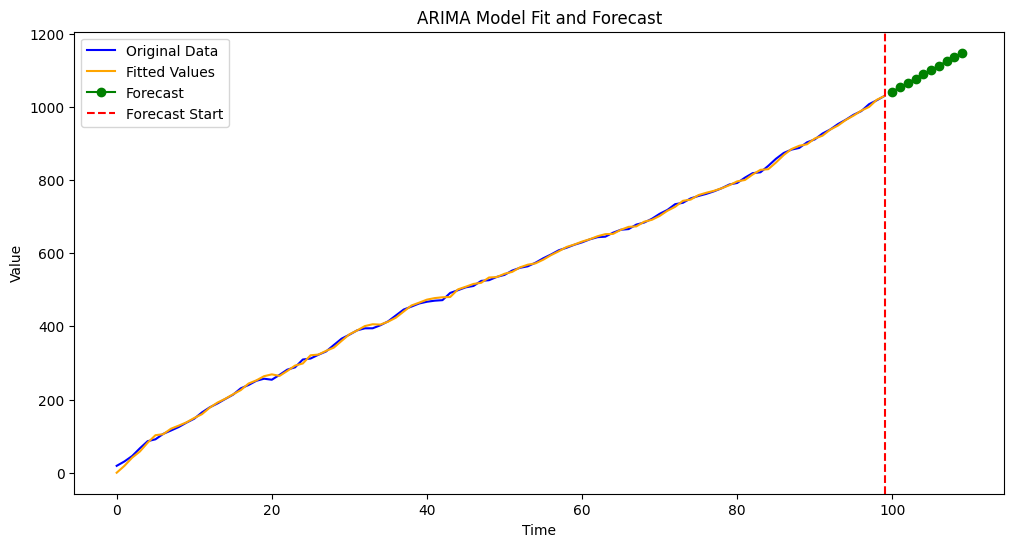

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Generate synthetic time series data (random walk around a mean of 10)
np.random.seed(0)
data = pd.Series(
    np.random.normal(loc=10, scale=5, size=100).cumsum()
)  # Cumulative sum to create a trend

# Fit ARIMA model
p = 1  # Order of autoregressive terms
d = 1  # Degree of differencing
q = 1  # Order of moving average terms
#model = ARIMA(data, order=(p, d, q), trend="c")
model = ARIMA(data, order=(p, d, q))

model_fit = model.fit()

# Print the model summary which includes mu, phi, theta, and sigma
print(model_fit.summary())

# Extract the estimated parameters
# mu_estimate = model_fit.params["const"]  # For the mean
phi_estimates = model_fit.params[0 : p]  # For the AR coefficients
theta_estimates = model_fit.params[p: p + q]  # For the MA coefficients
sigma_estimate = model_fit.params["sigma2"]  # For the variance of the noise

# print(f"Estimated Mu: {mu_estimate}")
print(f"Estimated Phi: {phi_estimates}")
print(f"Estimated Theta: {theta_estimates}")
print(f"Estimated Sigma^2: {sigma_estimate}")

# Forecasting the next 10 time points
forecast_steps = 10
forecast = model_fit.forecast(steps=forecast_steps)
forecast_index = np.arange(len(data), len(data) + forecast_steps)

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(data, label="Original Data", color="blue")
plt.plot(model_fit.fittedvalues, label="Fitted Values", color="orange")
plt.plot(forecast_index, forecast, label="Forecast", color="green", marker="o")
plt.axvline(x=len(data) - 1, color="red", linestyle="--", label="Forecast Start")
plt.title("ARIMA Model Fit and Forecast")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.show()


In [14]:
model_fit.params

const     532.549555
ar.L1       1.997766
ar.L2      -0.997779
ma.L1      -0.924548
ma.L2       0.030224
sigma2     24.884271
dtype: float64

In [16]:
model_fit.params[0]

/var/folders/gn/tx_t5g_d415bz89gw3p33nk9yqbnb8/T/ipykernel_7685/3706394920.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  model_fit.params[0]


np.float64(532.5495546003131)